# Restaurant Food Cost

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

#### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx')

In [3]:
df_train=pd.DataFrame(data=data)

# Exploratory Data Analysis

#### Checking the dataframe

In [4]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
df_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [6]:
df_train.tail(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12680,QUICK BITES,13798,"North Indian, Fast Food, Desserts",10am – 11pm (Mon-Sun),New Delhi,Near Malviya Nagar,3.4,13 votes,300
12681,CAFÉ,3241,"Beverages, Cafe, Bakery",11am – 11pm (Mon-Sun),Noida,Sector 18,4.1,300 votes,450
12682,QUICK BITES,8085,Fast Food,11am – 11pm (Mon-Sun),Chennai.,Mogappair,3.6,30 votes,450
12683,"QUICK BITES,SWEET SHOP",5430,"North Indian, South Indian, Street Food, Mithai",8:30am – 11pm (Mon-Sun),New Delhi,Pitampura,4.1,1426 votes,500
12684,CASUAL DINING,8324,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Moti Nagar,3.8,492 votes,550
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


#### Checking the shape of the dataframe

In [7]:
df_train.shape

(12690, 9)

#### Checking the dataframe information using info method

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


- The dataset has 12690 rows and 9 columns. We need predict the cost of food based on the features provided. Hence the target is cost. 
- Since the target column id Cost, hence we need to apply regression models for prediction.
- Accept RESTAURANT_ID and COST all the other columns are of object type.
- We can observe null values are present in the dataset. Need to perform further analysis.
- From the above analysis we can observed that the feature RESTAURANT_ID is used as indexing purpose. Hence we can drop it from the dataset. 
- Feature Vote and rating are of object type in the dataset. However, we can observe that both the features are of integer nature. Hence, we need to convert the features into integer.
- The string votes present in the VOTES feature has no value. Hence we need to remove it.

#### Removing the string votes from VOTES feature

In [9]:
df_train['VOTES']=df_train['VOTES'].str.replace(' votes','')

#### Checking uniques values in categorical columns

In [10]:
cat_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O' and feature not in ['VOTES','RATING']]
cat_features

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

#### Checking the count unique values in each categorical feature

In [11]:
for feature in cat_features:
    count=len(df_train[feature].unique())
    print('{}: Unique value count {}'.format(feature,count))
    print('\n')

TITLE: Unique value count 113


CUISINES: Unique value count 4155


TIME: Unique value count 2689


CITY: Unique value count 360


LOCALITY: Unique value count 1417




- High volume of unique categories can be observed in features CUISINES, TIME and LOCALITY.
- Moderate amount of unique categories can be observed in CITY and TITLE.

#### Checking for null values

In [12]:
def null_value_check(df_train):
    for column in df_train.columns:
        if column not in 'RESTAURANT_ID':
            total_null_count=df_train[column].isnull().sum()
            null_percentage=total_null_count*100/df_train.shape[0]
            print('{} count = {}. Percentage = {:.2f}%'.format(column,total_null_count,null_percentage))

In [13]:
null_value_check(df_train)

TITLE count = 1003. Percentage = 7.90%
CUISINES count = 0. Percentage = 0.00%
TIME count = 0. Percentage = 0.00%
CITY count = 112. Percentage = 0.88%
LOCALITY count = 98. Percentage = 0.77%
RATING count = 2. Percentage = 0.02%
VOTES count = 1204. Percentage = 9.49%
COST count = 0. Percentage = 0.00%


- We can observe that high percentage of null values present in columns Title and Votes with 7.90% and 9.49%.
- Column Votes, Locality and Rating has below 1% for null values present.
- CUISINES and TIME has no null values present.

#### Removing null values

- RATING and VOTES are of integer. Hence it will be preplace with 0.
- TITLE , CITY and LOCALITY are of object type. Hence null values will be replace with 'Not Available'.

#### Replacing null values on RATING with 0

In [14]:
df_train['RATING'].fillna(0,inplace=True)

#### Replacing null values in VOTES with 0

In [15]:
df_train['VOTES'].fillna(0,inplace=True)

#### Replacing null values in TITLE with Not Available

In [16]:
df_train['TITLE'].fillna('Not Available',inplace=True)

#### Replacing null values in CITY with Not Available

In [17]:
df_train['CITY'].fillna('Not Available',inplace=True)

#### Replacing null values in LOCALITY with Not Available

In [18]:
df_train['LOCALITY'].fillna('Not Available',inplace=True)

#### Verifying Null value presence

In [19]:
null_value_check(df_train)

TITLE count = 0. Percentage = 0.00%
CUISINES count = 0. Percentage = 0.00%
TIME count = 0. Percentage = 0.00%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 0. Percentage = 0.00%
VOTES count = 0. Percentage = 0.00%
COST count = 0. Percentage = 0.00%


- All null values are removed. No null value presence observed.

### Typecasting object to  integer

We can observe that the feature RATING and VOTES are of numerical nature. However, it is present in the dataset as object. Hence we need to change its data types as integer.

Checking for uniuqe values in RATING and VOTES

In [20]:
df_train['VOTES'].unique()

array(['49', '30', '221', ..., '2723', '1426', '1214'], dtype=object)

In [21]:
df_train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', 0, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

- We can observe that RATING has values such as 'NEW' and '-'.

Checking the count of value '-' in RATING

In [22]:
count=(df_train['RATING']=='-').sum()
count

495

- There are total of 495 '-' present in RATING

Replacing '-' with value 0

In [23]:
df_train['RATING']=df_train['RATING'].str.replace('-','0')

In [24]:
count=(df_train['RATING']=='-').sum()
count

0

Checking the count of value 'NEW' in RATING

In [25]:
count=(df_train['RATING']=='NEW').sum()
count

707

Replacing 'NEW' with value 0

In [26]:
df_train['RATING']=df_train['RATING'].str.replace('NEW','0')

In [27]:
count=(df_train['RATING']=='NEW').sum()
count

0

Typecasting VOTES feature as Integer

In [28]:
df_train['VOTES']=df_train['VOTES'].astype('int')

Typecasting RATING feature into float

In [29]:
df_train['RATING']=df_train['RATING'].astype('float')

Verifying the datatypes

In [30]:
df_train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object

#### Separating each CUISINES into a separate columns

In [31]:
cuisines_split = df_train['CUISINES'].str.split(', ', expand=True)
cuisines_split.columns = [f'CUISINE_{i+1}' for i in range(cuisines_split.shape[1])]
df_train = pd.concat([df_train, cuisines_split], axis=1)

In [32]:
df_train.drop('CUISINES', axis=1, inplace=True)

#### Separating each Title into a separate columns

In [33]:
title_split = df_train['TITLE'].str.split(',', expand=True)
title_split.columns = [f'TITLE_{i+1}' for i in range(title_split.shape[1])]
df_train = pd.concat([df_train, title_split], axis=1)

In [34]:
df_train.drop('TITLE', axis=1, inplace=True)

#### Analysing TIME column

In [35]:
df_train['TIME'].nunique()

2689

- Total 2689 unique time are present 

In [36]:
df_train['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

- We will remove the time column from the due to large unique values present

#### Dropping TIME column

In [37]:
df_train.drop('TIME',axis=1,inplace=True)

#### Dropping RESTAURANT_ID

In [38]:
df_train.drop('RESTAURANT_ID',axis=1,inplace=True)

#### Checking the revised columns

In [39]:
df_train.columns.to_list()

['CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST',
 'CUISINE_1',
 'CUISINE_2',
 'CUISINE_3',
 'CUISINE_4',
 'CUISINE_5',
 'CUISINE_6',
 'CUISINE_7',
 'CUISINE_8',
 'TITLE_1',
 'TITLE_2']

#### Rearranging the columns for better analysis

In [40]:
rearrange=['TITLE_1','TITLE_2',
           'CUISINE_1','CUISINE_2','CUISINE_3','CUISINE_4','CUISINE_5','CUISINE_6','CUISINE_7','CUISINE_8',
           'CITY',
           'LOCALITY',
           'RATING',
           'VOTES',
           'COST'
          ]

In [41]:
df_train=df_train[rearrange]

In [42]:
df_train

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,None,Malwani,Goan,North Indian,None,None,None,None,None,Thane,Dombivali East,3.6,49,1200
1,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None,Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,Chennai,Saligramam,3.8,221,800
3,QUICK BITES,None,Tibetan,Chinese,None,None,None,None,None,None,Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,None,Desserts,None,None,None,None,None,None,None,Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,None,North Indian,Burger,Kebab,None,None,None,None,None,Hyderabad,Gachibowli,3.8,546,500
12686,CASUAL DINING,BAR,Goan,Continental,None,None,None,None,None,None,Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,None,Finger Food,Continental,Asian,Chinese,None,None,None,None,Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food,None,None,None,None,Chennai,Maduravoyal,3.5,32,400


#### Checking for Null values

In [43]:
null_value_check(df_train)

TITLE_1 count = 0. Percentage = 0.00%
TITLE_2 count = 11208. Percentage = 88.32%
CUISINE_1 count = 0. Percentage = 0.00%
CUISINE_2 count = 3062. Percentage = 24.13%
CUISINE_3 count = 6999. Percentage = 55.15%
CUISINE_4 count = 9995. Percentage = 78.76%
CUISINE_5 count = 11675. Percentage = 92.00%
CUISINE_6 count = 12277. Percentage = 96.75%
CUISINE_7 count = 12539. Percentage = 98.81%
CUISINE_8 count = 12665. Percentage = 99.80%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 2. Percentage = 0.02%
VOTES count = 0. Percentage = 0.00%
COST count = 0. Percentage = 0.00%


#### Checking unique values in TITLE_2

In [44]:
df_train['TITLE_2'].unique()

array([None, 'BAR', 'BEVERAGE SHOP', 'IRANI CAFE', 'QUICK BITES',
       'CASUAL DINING', 'DESSERT PARLOR', 'SWEET SHOP', 'LOUNGE',
       'FOOD COURT', 'KIOSK', 'CAFÉ', 'CONFECTIONERY', 'MICROBREWERY',
       'PUB', 'BAKERY', 'CLUB', 'FINE DINING', 'FOOD TRUCK', 'PAAN SHOP'],
      dtype=object)

#### Checking unique values in CUISINE_2

In [45]:
df_train['CUISINE_2'].unique()

array(['Goan', 'Modern Indian', 'Chinese', None, 'North Indian', 'Burger',
       'Mughlai', 'Hyderabadi', 'Fast Food', 'Thai', 'European', 'Rolls',
       'Italian', 'Continental', 'Tea', 'Coffee', 'Indonesian',
       'Healthy Food', 'South Indian', 'Nepalese', 'Pizza', 'Desserts',
       'Beverages', 'Street Food', 'Momos', 'Mithai', 'Biryani',
       'Japanese', 'Mexican', 'Iranian', 'Kebab', 'Sandwich', 'Andhra',
       'Seafood', 'Rajasthani', 'Tex-Mex', 'Kerala', 'Arabian',
       'Ice Cream', 'American', 'Chettinad', 'Lebanese', 'Asian',
       'Mediterranean', 'Juices', 'Finger Food', 'French', 'Gujarati',
       'Bakery', 'Wraps', 'Lucknowi', 'Konkan', 'Cafe', 'Sushi', 'Salad',
       'Bubble Tea', 'Afghan', 'BBQ', 'Awadhi', 'Maharashtrian',
       'North Eastern', 'Bengali', 'Bihari', 'Malaysian', 'German',
       'Turkish', 'Tibetan', 'Cantonese', 'Oriya', 'Kashmiri', 'Malwani',
       'Mangalorean', 'Parsi', 'Korean', 'Burmese', 'Vietnamese', 'Tamil',
       'Bar Food', 'I

#### Checking unique values in CUISINE_3

In [46]:
df_train['CUISINE_3'].unique()

array(['North Indian', 'Japanese', 'Biryani', None, 'Seafood', 'Pizza',
       'Fast Food', 'Beverages', 'Chinese', 'Momos', 'Mughlai', 'BBQ',
       'Continental', 'Asian', 'European', 'Tea', 'Korean', 'American',
       'Mexican', 'Indian', 'Burger', 'Healthy Food', 'Thai', 'Italian',
       'Sandwich', 'Maharashtrian', 'Roast Chicken', 'South Indian',
       'Ice Cream', 'Rolls', 'Chettinad', 'Kebab', 'Hyderabadi',
       'North Eastern', 'Lebanese', 'Cafe', 'Salad', 'Desserts', 'Mithai',
       'Street Food', 'Andhra', 'Lucknowi', 'Bengali', 'Steak',
       'Sri Lankan', 'Arabian', 'Juices', 'Coffee', 'Mediterranean',
       'Kerala', 'Indonesian', 'Malaysian', 'French', 'Bakery',
       'Rajasthani', 'Wraps', 'Vietnamese', 'Grill', 'Singaporean',
       'Malwani', 'Finger Food', 'Modern Indian', 'Sushi', 'Goan',
       'Hot Pot', 'Mangalorean', 'Burmese', 'Afghan', 'Drinks Only',
       'Moroccan', 'Panini', 'Tex-Mex', 'Awadhi', 'Bar Food',
       'Charcoal Chicken', 'Turkish', 'B

#### Checking unique values in CUISINE_4

In [47]:
df_train['CUISINE_4'].unique()

array([None, 'Hyderabadi', 'Biryani', 'North Indian', 'Rolls', 'Italian',
       'American', 'Chinese', 'Healthy Food', 'Fast Food', 'Momos',
       'Seafood', 'Malaysian', 'Thai', 'Beverages', 'Salad',
       'Finger Food', 'Continental', 'Ice Cream', 'Rajasthani', 'Burmese',
       'Mughlai', 'Coffee and Tea', 'Street Food', 'Japanese', 'Sandwich',
       'Asian', 'Awadhi', 'European', 'Kebab', 'Juices', 'Mexican',
       'Burger', 'South Indian', 'Desserts', 'Kerala', 'Goan',
       'Modern Indian', 'BBQ', 'Mediterranean', 'Gujarati', 'Steak',
       'Pizza', 'Afghan', 'Chettinad', 'Tea', 'Mithai', 'Indonesian',
       'Bar Food', 'Bakery', 'Grill', 'Wraps', 'Konkan', 'Middle Eastern',
       'Andhra', 'Korean', 'Vietnamese', 'Mangalorean', 'Malwani',
       'Lebanese', 'Cafe', 'Tex-Mex', 'Spanish', 'Coffee', 'Arabian',
       'Cafe Food', 'Sri Lankan', 'Mongolian', 'Sushi', 'Maharashtrian',
       'Tibetan', 'Parsi', 'Turkish', 'Bengali', 'Indian', 'Iranian',
       'Nepalese', 'Po

#### Checking unique values in CUISINE_5

In [48]:
df_train['CUISINE_5'].unique()

array([None, 'Burger', 'Healthy Food', 'Fast Food', 'Continental',
       'Vietnamese', 'American', 'South Indian', 'Desserts', 'Chinese',
       'Juices', 'Seafood', 'Grill', 'BBQ', 'Malaysian', 'Salad', 'Cafe',
       'Goan', 'Japanese', 'Asian', 'Kebab', 'Pizza', 'Chettinad',
       'Wraps', 'Beverages', 'Street Food', 'Momos', 'Andhra', 'Italian',
       'Finger Food', 'Mughlai', 'North Indian', 'French', 'Rajasthani',
       'Middle Eastern', 'Sandwich', 'Mithai', 'Pan Asian', 'Arabian',
       'Thai', 'Tibetan', 'Hyderabadi', 'Coffee', 'Rolls', 'Sushi',
       'Biryani', 'Mangalorean', 'European', 'German', 'Gujarati',
       'Ice Cream', 'Malwani', 'Korean', 'Spanish', 'Steak', 'Indonesian',
       'Singaporean', 'Mexican', 'Bengali', 'Maharashtrian', 'Bar Food',
       'Kerala', 'Lucknowi', 'Lebanese', 'Poké', 'Mediterranean',
       'Bakery', 'Fusion', 'Awadhi', 'Burmese', 'Bubble Tea', 'Kashmiri',
       'Indian', 'Nepalese', 'European,', 'Afghan', 'Iranian', 'Tea',
       'M

#### Checking unique values in CUISINE_6

In [49]:
df_train['CUISINE_6'].unique()

array([None, 'Japanese', 'Arabian', 'North Indian', 'Beverages', 'Asian',
       'Pizza', 'Momos', 'Coffee', 'Kebab', 'Desserts', 'Rolls', 'Cafe',
       'Sandwich', 'Burger', 'Salad,', 'Juices', 'Seafood',
       'South Indian', 'Goan', 'Fast Food', 'Healthy Food,', 'Salad',
       'Italian', 'Desserts,', 'Street Food', 'Burmese', 'Mexican',
       'Sri Lankan', 'Steak', 'Kerala', 'Satay', 'Awadhi', 'Biryani',
       'Chinese', 'Finger Food,', 'Lebanese', 'Mughlai', 'American',
       'European', 'Continental', 'Malaysian', 'Wraps', 'Tea',
       'Hyderabadi', 'Cafe Food,', 'Healthy Food', 'Konkan', 'Chinese,',
       'Mediterranean', 'Bengali,', 'Kebab,', 'Thai', 'Mithai',
       'Beverages,', 'Tex-Mex', 'Indian', 'Gujarati', 'Fast Food,',
       'Finger Food', 'Cafe Food', 'Charcoal Chicken,', 'Ice Cream,',
       'Sandwich,', 'Poké', 'Grill', 'Bar Food', 'Mediterranean,',
       'Panini', 'French', 'Sushi', 'Vietnamese', 'Afghan', 'Ice Cream',
       'Bakery', 'Vegan', 'South India

#### Checking unique values in CUISINE_7

In [50]:
df_train['CUISINE_7'].unique()

array([None, 'Biryani,', 'Tea', 'Burger', 'Sandwich', ',', 'European,',
       'North Indian', 'Italian', 'BBQ', 'Vietnamese', 'Pizza',
       'North Indian,', 'Salad', 'Dumplings,', 'Desserts', 'Burmese',
       'Seafood', 'Beverages', 'French', 'Desserts,', 'Arabian,',
       'Chinese,', 'Lucknowi,', 'Healthy Food,', 'Mangalorean', 'Momos',
       'Indonesian', 'Mughlai', 'Chinese', 'Mediterranean,', 'Lebanese',
       'Parsi', 'Juices,', 'Seafood,', 'Middle Eastern,', 'Continental',
       'Bakery', 'Biryani', 'Salad,', 'Healthy Food', 'Kebab', 'Afghan',
       'Lebanese,', 'Pizza,', 'Turkish', 'American', 'Thai',
       'South Indian', 'Beverages,', 'American,', 'Sandwich,', 'Steak',
       'Modern Indian,', 'Momos,', 'Coffee', 'Japanese,', 'Malaysian,',
       'Rolls', 'Spanish'], dtype=object)

#### Checking unique values in CUISINE_8

In [51]:
df_train['CUISINE_8'].unique()

array([None, 'Healthy Food', 'Pizza', 'Ice Cream', 'Lebanese', 'Desserts',
       'Asian', 'Mexican', 'Fast Food', 'Rolls', 'Beverages', 'Chinese',
       'Momos', 'North Indian', 'Burger', 'Coffee and Tea', 'Cafe Food',
       'Salad', 'European'], dtype=object)

#### Remove NULL from 'CUISINES'

In [52]:
df_train['CUISINE_2'].fillna('0',inplace=True)
df_train['CUISINE_3'].fillna('0',inplace=True)
df_train['CUISINE_4'].fillna('0',inplace=True)
df_train['CUISINE_5'].fillna('0',inplace=True)
df_train['CUISINE_6'].fillna('0',inplace=True)
df_train['CUISINE_7'].fillna('0',inplace=True)
df_train['CUISINE_8'].fillna('0',inplace=True)

#### Remove NULL from 'TITLE_2'

In [53]:
df_train['TITLE_2'].fillna('0',inplace=True)

#### Checking the RATING Null values

In [54]:
df_train.loc[df_train['RATING'].isnull()]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST
204,BAKERY,0,Bakery,0,0,0,0,0,0,0,Kochi,Marine Drive,NaN,0,200
421,CAFÉ,0,Cafe,Fast Food,0,0,0,0,0,0,Hyderabad,Banjara Hills,NaN,0,350


#### Removing null values from RATING

In [55]:
df_train['RATING'].fillna(0,inplace=True)

#### Verifying Null values

In [56]:
null_value_check(df_train)

TITLE_1 count = 0. Percentage = 0.00%
TITLE_2 count = 0. Percentage = 0.00%
CUISINE_1 count = 0. Percentage = 0.00%
CUISINE_2 count = 0. Percentage = 0.00%
CUISINE_3 count = 0. Percentage = 0.00%
CUISINE_4 count = 0. Percentage = 0.00%
CUISINE_5 count = 0. Percentage = 0.00%
CUISINE_6 count = 0. Percentage = 0.00%
CUISINE_7 count = 0. Percentage = 0.00%
CUISINE_8 count = 0. Percentage = 0.00%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 0. Percentage = 0.00%
VOTES count = 0. Percentage = 0.00%
COST count = 0. Percentage = 0.00%


#### Checking for empty string

In [57]:
df_train[df_train.applymap(lambda x: x == '').any(axis=1)]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST


- There are empty string present.

In [58]:
df_train.replace('', 'X', inplace=True)

#### Verying empty string

In [59]:
df_train[df_train.applymap(lambda x: x == '').any(axis=1)]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST


- All empty strings removed

# Data visualization

#### Visualising rating and cost using regplot

<Axes: xlabel='RATING', ylabel='COST'>

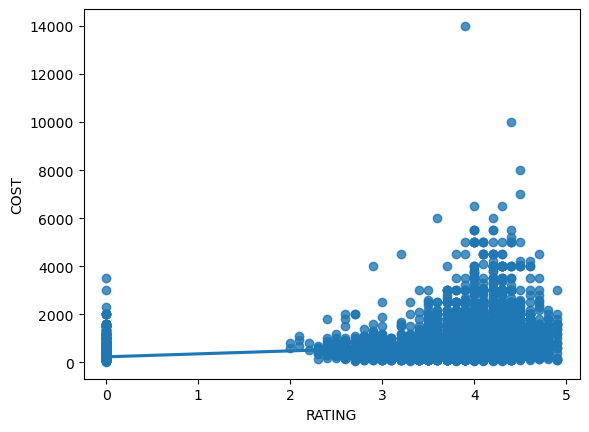

In [60]:
sns.regplot(x=df_train['RATING'],y=df_train['COST'],data=df_train)

#### Visualising votes and cost using regplot¶

<Axes: xlabel='VOTES', ylabel='COST'>

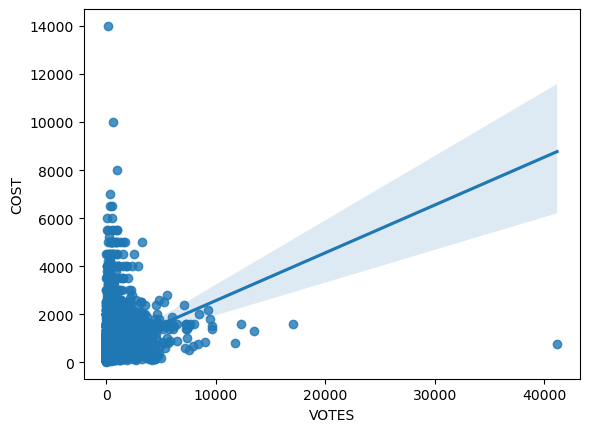

In [61]:
sns.regplot(x=df_train['VOTES'],y=df_train['COST'],data=df_train)

# Checking for Outliers

In [62]:
num_features=[feature for feature in df_train.columns if df_train[feature].dtypes!='O']
num_features

['RATING', 'VOTES', 'COST']

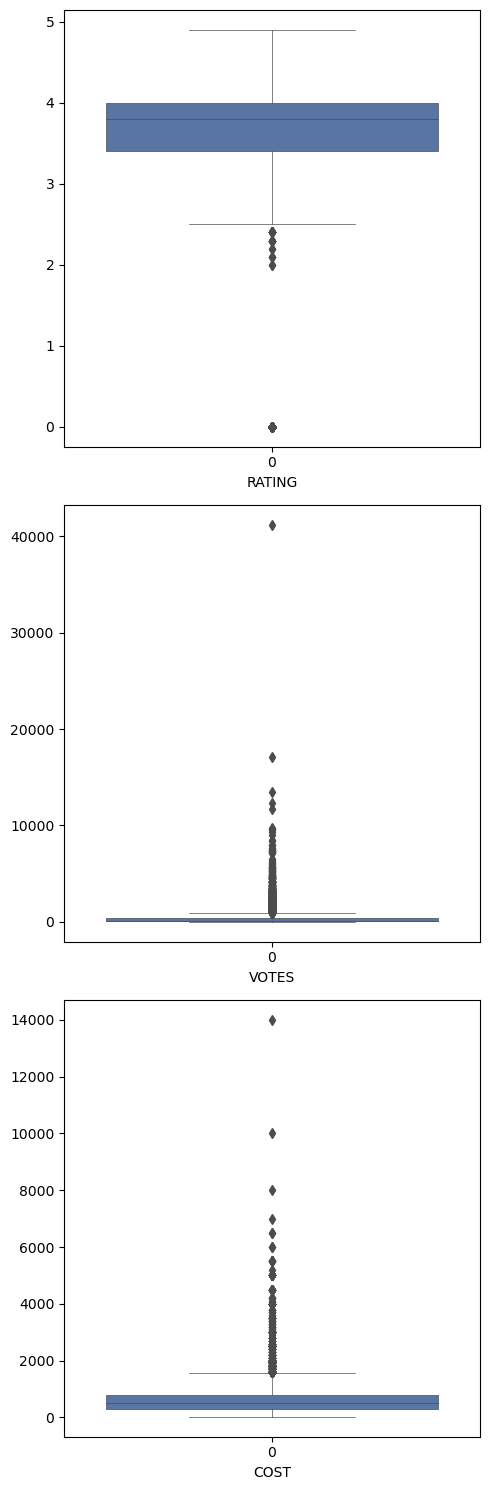

In [63]:
plt.figure(figsize=(5,15))
index=1
for feature in num_features:
    if index<=len(num_features):
        plt.subplot(3,1,index)
        sns.boxplot(df_train[feature],palette='deep',linewidth=.5)
        plt.xlabel(feature)
        index+=1
        
plt.tight_layout()

Checking max rating

In [64]:
df_train['VOTES'].max()

41186

Checking max rating

In [65]:
df_train['RATING'].max()

4.9

Checking max cost

In [66]:
df_train['COST'].max()

14000

Checking outlier using zscore

In [67]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[['RATING','VOTES']]))
    print(np.where(z_score>3))
    return z_score

Checking for zscore values higher than 3

In [68]:
z_score=outliers_detection(df_train)

(array([  186,   196,   293,   303,   304,   344,   354,   431,   510,
         775,   796,   852,   855,   872,   913,  1034,  1038,  1132,
        1147,  1151,  1244,  1346,  1467,  1476,  1522,  1540,  1617,
        1681,  1685,  1850,  2090,  2204,  2268,  2302,  2305,  2886,
        2905,  2977,  3028,  3033,  3289,  3333,  3398,  3408,  3507,
        3578,  3587,  3706,  3728,  3841,  3855,  3877,  3909,  3952,
        3974,  3987,  4124,  4150,  4192,  4193,  4268,  4367,  4470,
        4512,  4557,  4578,  4592,  4618,  4628,  4634,  4647,  4658,
        4691,  4709,  4760,  4768,  4855,  4947,  4987,  5078,  5140,
        5257,  5375,  5492,  5502,  5594,  5629,  5662,  5774,  5792,
        5836,  5880,  5897,  5969,  5996,  6005,  6142,  6390,  6421,
        6446,  6448,  6472,  6496,  6506,  6519,  6608,  6649,  6684,
        6690,  6714,  6760,  6878,  6922,  6982,  7028,  7034,  7059,
        7189,  7202,  7262,  7459,  7494,  7626,  7988,  7997,  8009,
        8123,  8400

Removing outliers in the dataset

In [69]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [70]:
df_clean=removing_outliers(z_score,df_train)

In [71]:
df_clean.shape

(12488, 15)

Calculating the total data loss

In [72]:
total_data_loss=df_train.shape[0]-df_clean.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 202


Calculating the percentage of data loss

In [73]:
total_data=df_train.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 1.59%


Assigning the outlier free dataset to df_train

In [74]:
df_train=df_clean

# Skewness check

Checking the skewness of all the numerical features

In [75]:
df_train[['RATING','VOTES']].skew()

RATING   -2.203071
VOTES     2.548633
dtype: float64

- Skewness present in RATING and VOTES

Removing skewness in VOTED using cube root

In [76]:
votes_cbrt=np.cbrt(df_train['VOTES'])

In [77]:
votes_cbrt.skew()

0.3083038868854167

In [78]:
df_train['VOTES']=votes_cbrt

In [79]:
df_train[['RATING','VOTES']].skew()

RATING   -2.203071
VOTES     0.308304
dtype: float64

In [80]:
df_train

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,0,Malwani,Goan,North Indian,0,0,0,0,0,Thane,Dombivali East,3.6,3.659306,1200
1,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,0,0,0,0,0,Chennai,Ramapuram,4.2,3.107233,1500
2,CASUAL DINING,0,North Indian,Chinese,Biryani,Hyderabadi,0,0,0,0,Chennai,Saligramam,3.8,6.045944,800
3,QUICK BITES,0,Tibetan,Chinese,0,0,0,0,0,0,Mumbai,Bandra West,4.1,2.884499,800
4,DESSERT PARLOR,0,Desserts,0,0,0,0,0,0,0,Mumbai,Lower Parel,3.8,5.484807,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,0,North Indian,Burger,Kebab,0,0,0,0,0,Hyderabad,Gachibowli,3.8,8.173302,500
12686,CASUAL DINING,BAR,Goan,Continental,0,0,0,0,0,0,Mumbai,Bandra Kurla Complex,4.3,10.667752,1800
12687,LOUNGE,0,Finger Food,Continental,Asian,Chinese,0,0,0,0,Navi Mumbai,Vashi,4.0,8.471647,1300
12688,CASUAL DINING,0,North Indian,South Indian,Chinese,Street Food,0,0,0,0,Chennai,Maduravoyal,3.5,3.174802,400


#### Applying LabelEncoder

In [81]:
cat_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
cat_features

['TITLE_1',
 'TITLE_2',
 'CUISINE_1',
 'CUISINE_2',
 'CUISINE_3',
 'CUISINE_4',
 'CUISINE_5',
 'CUISINE_6',
 'CUISINE_7',
 'CUISINE_8',
 'CITY',
 'LOCALITY']

In [82]:
le=LabelEncoder()
df_train[cat_features]=df_train[cat_features].apply(lambda feature: le.fit_transform(feature))

In [83]:
df_train

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES,COST
0,4,0,58,33,67,0,0,0,1,0,320,284,3.6,3.659306,1200
1,4,2,6,61,42,0,0,0,1,0,67,1043,4.2,3.107233,1500
2,4,0,71,24,13,33,0,0,1,0,67,1097,3.8,6.045944,800
3,21,0,98,24,0,0,0,0,1,0,222,136,4.1,2.884499,800
4,8,0,27,0,0,0,0,0,1,0,222,619,3.8,5.484807,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,21,0,71,18,45,0,0,0,1,0,131,341,3.8,8.173302,500
12686,4,2,36,26,0,0,0,0,1,0,222,133,4.3,10.667752,1800
12687,14,0,33,26,5,19,0,0,1,0,239,1338,4.0,8.471647,1300
12688,4,0,71,85,22,77,0,0,1,0,67,630,3.5,3.174802,400


#### Checking correlation

<Axes: >

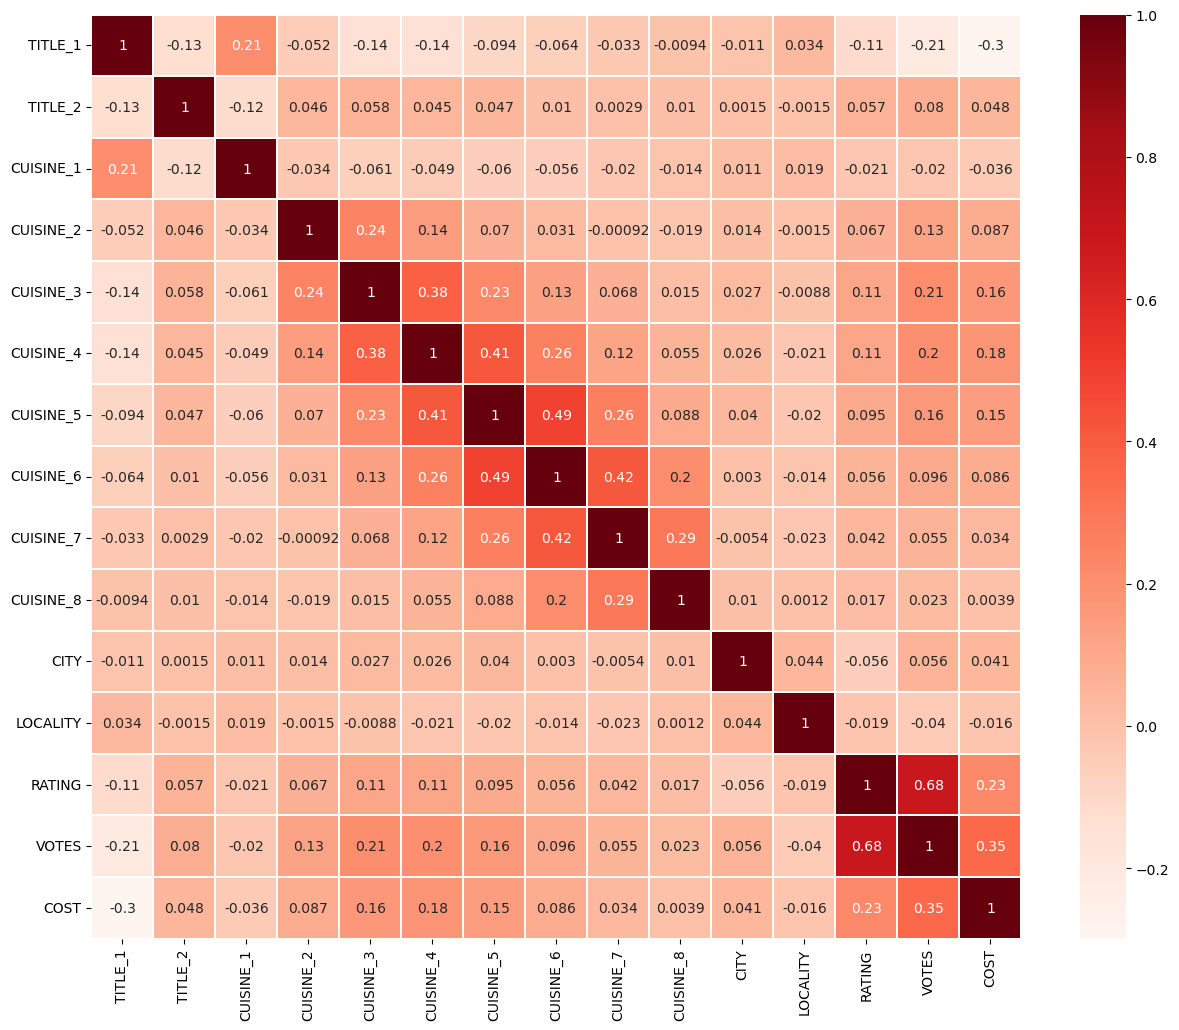

In [86]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(),annot=True,linewidth=.2,fmt='.2g',cmap='Reds')

# Scaling the Dataset

Separating dependent and target columns

In [87]:
x=df_train.drop('COST',axis=1)
y=df_train['COST']

Applying StandardScaler

In [88]:
def StandardScaling(x):
    ss=StandardScaler()
    x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
    return x

In [89]:
x=StandardScaling(x)

In [90]:
x

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES
0,-0.925355,-0.268184,0.344216,0.008218,1.874272,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,2.091576,-0.933229,0.158749,-0.545025
1,-0.925355,0.333465,-1.508890,0.978023,0.919147,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,-0.913904,0.973449,0.665816,-0.725996
2,-0.925355,-0.268184,0.807492,-0.303505,-0.188798,1.277021,-0.244094,-0.158682,-0.086757,-0.037572,-0.913904,1.109102,0.327772,0.237322
3,1.139466,-0.268184,1.769682,-0.303505,-0.685463,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,0.927398,-1.305018,0.581305,-0.799009
4,-0.439515,-0.268184,-0.760521,-1.134767,-0.685463,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,0.927398,-0.091678,0.327772,0.053380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12483,1.139466,-0.268184,0.807492,-0.511321,1.033762,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,-0.153624,-0.790039,0.327772,0.934677
12484,-0.925355,0.333465,-0.439791,-0.234233,-0.685463,-0.423001,-0.244094,-0.158682,-0.086757,-0.037572,0.927398,-1.312554,0.750327,1.752366
12485,0.289246,-0.268184,-0.546701,-0.234233,-0.494438,0.555800,-0.244094,-0.158682,-0.086757,-0.037572,1.129347,1.714516,0.496794,1.032476
12486,-0.925355,-0.268184,0.807492,1.809285,0.155047,3.543718,-0.244094,-0.158682,-0.086757,-0.037572,-0.913904,-0.064045,0.074238,-0.703847


# Variance Inflation Factor

In [91]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [92]:
vif_cal(x)

,Features,VIF Factor
0,TITLE_1,1.122732
1,TITLE_2,1.031891
2,CUISINE_1,1.061132
3,CUISINE_2,1.075508
4,CUISINE_3,1.257329
5,CUISINE_4,1.377130
6,CUISINE_5,1.513176
7,CUISINE_6,1.511759
8,CUISINE_7,1.289238
9,CUISINE_8,1.105941


- The VIF factor in the dataset is within the acceptable range.

# Modelling

Calculating the random state and score

In [99]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        model_lr=LinearRegression()
        model_lr.fit(x_train,y_train)
        pred=model_lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [100]:
random_state_cal(x,y)

R2 Score :0.2227843483694968 Random state :65


Applying train_test_split with test_size=.30 and random_state=65

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=37)

Linear Regression

In [102]:
def Linear_Regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [103]:
prediction_chart,prediction_lr=Linear_Regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,19.723176
1,R2 Score on Training Data,18.662790
2,Mean Absolute Error,314.308658
3,Mean Squared Error,280500.014881
4,Root Mean Squared Error,529.622521


Lasso Regression

In [104]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [105]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,19.704936
1,R2 Score on Training Data,18.658809
2,Mean Absolute Error,314.620269
3,Mean Squared Error,280563.747491
4,Root Mean Squared Error,529.682686


Ridge Regression

In [106]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [107]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,19.723283
1,R2 Score on Training Data,18.662789
2,Mean Absolute Error,314.308564
3,Mean Squared Error,280499.642187
4,Root Mean Squared Error,529.622169


Random forest

In [108]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [109]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,66.318904
1,R2 Score on Training Data,95.565692
2,Mean Absolute Error,193.034096
3,Mean Squared Error,117687.117990
4,Root Mean Squared Error,343.055561


KNN Regressor

In [110]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [111]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,36.365188
1,R2 Score on Training Data,53.850768
2,Mean Absolute Error,267.220657
3,Mean Squared Error,222350.172437
4,Root Mean Squared Error,471.540213


SVR

In [112]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [113]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,6.762548
1,R2 Score on Training Data,5.597786
2,Mean Absolute Error,294.280101
3,Mean Squared Error,325786.516250
4,Root Mean Squared Error,570.777116


DecisionTree Regressor

In [114]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [115]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,4.664338
1,R2 Score on Training Data,99.988189
2,Mean Absolute Error,266.314874
3,Mean Squared Error,333117.995085
4,Root Mean Squared Error,577.163751


Gradient Boosting

In [116]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [117]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,70.088894
1,R2 Score on Training Data,71.871906
2,Mean Absolute Error,194.688865
3,Mean Squared Error,104514.170513
4,Root Mean Squared Error,323.286515


Extratrees Regressor

In [118]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=GradientBoostingRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [119]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,70.070552
1,R2 Score on Training Data,71.871906
2,Mean Absolute Error,194.735536
3,Mean Squared Error,104578.260669
4,Root Mean Squared Error,323.385622


### Cross validating for all the regression models

In [120]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor'],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr]
                    })
    return df

In [121]:
pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr]

In [122]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.197232,0.189852,0.007379
1,Lasso,0.197049,0.189931,0.007119
2,Ridge,0.197233,0.189853,0.007380
3,Random Forest,0.663189,0.700257,-0.037068
4,KNN,0.363652,0.323467,0.040185
5,SVR,0.067625,0.064544,0.003081
6,Decision Tree,0.046643,0.357454,-0.310811
7,GradientBoost,0.700889,0.687849,0.013040
8,ExtraTreesRegressor,0.700706,0.693666,0.007039


- We have observed that both GradientBoost model and Ridge ExtraTreesRegressor model are performing well. 
- The Cross Val Score is better in ExtraTreesRegressor and difference between them is low. 

Hence ExtraTreesRegressor will be best fit model.

# Hypertuning using GridSearchCV

Creating parameter list for ExtraTreesRegressor 

In [126]:
parameters = {
    'n_estimators': [50, 100, 200],               
    'max_features': ['auto', 'sqrt', 'log2'],      
    'max_depth': [None, 10, 20, 30],              
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],                        
    'random_state': [42,65,70] 
}

Applying GridSearchCV on the ExtraTreesRegressor model

In [127]:
gridsearch_cv=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)

In [128]:
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         'random_state': [42, 65, 70]})

Checking the best parameter

In [129]:
gridsearch_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200,
 'random_state': 42}

# Creating the Final model

In [130]:
final_model=ExtraTreesRegressor(n_estimators= 200, max_features= 'auto', max_depth=20 ,criterion= 'squared_error', random_state= 42)

In [131]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mean_absolute_error(y_test,pred))

prediction_chart=pd.DataFrame({'Final model':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,mae,mse,rmse]
                                  })
prediction_chart

,Final model,Scores
0,R2 Score,0.691923
1,Mean Absolute Error,191.019436
2,Mean Squared Error,107647.008181
3,Root Mean Squared Error,13.820978


# Saving the model

In [132]:
import pickle

In [133]:
file='Restaurant_Price_Prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

# Exploratory Data Analysis - Test Data

In [136]:
test_data=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx')

In [137]:
df_test=pd.DataFrame(data=test_data)

In [138]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [139]:
df_test.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703 votes
8,NaN,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes


In [140]:
df_test.shape

(4231, 8)

In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


Removing the string votes from VOTES feature

In [142]:
df_test['VOTES']=df_test['VOTES'].str.replace(' votes','')

Checking uniques values in categorical columns

In [143]:
cat_features=[feature for feature in df_test.columns if df_test[feature].dtypes=='O' and feature not in ['VOTES','RATING']]
cat_features

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

Checking the count unique values in each categorical feature

In [144]:
for feature in cat_features:
    count=len(df_test[feature].unique())
    print('{}: Unique value count {}'.format(feature,count))
    print('\n')

TITLE: Unique value count 86


CUISINES: Unique value count 1727


TIME: Unique value count 1183


CITY: Unique value count 152


LOCALITY: Unique value count 835




Checking for null values

In [145]:
def null_value_check(df_test):
    for column in df_test.columns:
        if column not in 'RESTAURANT_ID':
            total_null_count=df_test[column].isnull().sum()
            null_percentage=total_null_count*100/df_test.shape[0]
            print('{} count = {}. Percentage = {:.2f}%'.format(column,total_null_count,null_percentage))

In [146]:
null_value_check(df_test)

TITLE count = 284. Percentage = 6.71%
CUISINES count = 0. Percentage = 0.00%
TIME count = 0. Percentage = 0.00%
CITY count = 35. Percentage = 0.83%
LOCALITY count = 30. Percentage = 0.71%
RATING count = 2. Percentage = 0.05%
VOTES count = 402. Percentage = 9.50%


Removing null values

Replacing null values on RATING with 0

In [147]:
df_test['RATING'].fillna(0,inplace=True)

Replacing null values in VOTES with 0

In [148]:
df_test['VOTES'].fillna(0,inplace=True)

Replacing null values in TITLE with Not Available

In [149]:
df_test['TITLE'].fillna('Not Available',inplace=True)

Replacing null values in CITY with Not Available

In [150]:
df_test['CITY'].fillna('Not Available',inplace=True)

Replacing null values in LOCALITY with Not Available

In [151]:
df_test['LOCALITY'].fillna('Not Available',inplace=True)

Verifying Null value presence

In [152]:
null_value_check(df_test)

TITLE count = 0. Percentage = 0.00%
CUISINES count = 0. Percentage = 0.00%
TIME count = 0. Percentage = 0.00%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 0. Percentage = 0.00%
VOTES count = 0. Percentage = 0.00%


Typecasting object to integer

Checking for uniuqe values in RATING and VOTES

In [153]:
df_test['VOTES'].unique()

array(['564', '61', '350', ..., '1697', '749', '1239'], dtype=object)

In [154]:
df_test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', 0], dtype=object)

Checking the count of value '-' in RATING

In [155]:
count=(df_test['RATING']=='-').sum()
count

177

Replacing '-' with value 0

In [156]:
df_test['RATING']=df_test['RATING'].str.replace('-','0')

In [157]:
count=(df_test['RATING']=='-').sum()
count

0

Checking the count of value 'NEW' in RATING

In [158]:
count=(df_test['RATING']=='NEW').sum()
count

223

Replacing 'NEW' with value 0

In [159]:
df_test['RATING']=df_test['RATING'].str.replace('NEW','0')

In [160]:
count=(df_test['RATING']=='NEW').sum()
count

0

Typecasting VOTES feature as Integer

In [161]:
df_test['VOTES']=df_test['VOTES'].astype('int')

Typecasting RATING feature into float

In [162]:
df_test['RATING']=df_test['RATING'].astype('float')

Verifying the datatypes

In [163]:
df_test.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
dtype: object

Separating each CUISINES into a separate columns

In [164]:
cuisines_split = df_test['CUISINES'].str.split(', ', expand=True)
cuisines_split.columns = [f'CUISINE_{i+1}' for i in range(cuisines_split.shape[1])]
df_test = pd.concat([df_test, cuisines_split], axis=1)

In [165]:
df_test.drop('CUISINES', axis=1, inplace=True)

Separating each Title into a separate columns

In [166]:
title_split = df_test['TITLE'].str.split(',', expand=True)
title_split.columns = [f'TITLE_{i+1}' for i in range(title_split.shape[1])]
df_test = pd.concat([df_test, title_split], axis=1)

In [167]:
df_test.drop('TITLE', axis=1, inplace=True)

Dropping TIME column

In [168]:
df_test.drop('TIME',axis=1,inplace=True)

Dropping RESTAURANT_ID

In [169]:
df_test.drop('RESTAURANT_ID',axis=1,inplace=True)

Checking the revised columns

In [170]:
df_test.columns.to_list()

['CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'CUISINE_1',
 'CUISINE_2',
 'CUISINE_3',
 'CUISINE_4',
 'CUISINE_5',
 'CUISINE_6',
 'CUISINE_7',
 'CUISINE_8',
 'TITLE_1',
 'TITLE_2']

Rearranging the columns for better analysis

In [171]:
rearrange=['TITLE_1','TITLE_2',
           'CUISINE_1','CUISINE_2','CUISINE_3','CUISINE_4','CUISINE_5','CUISINE_6','CUISINE_7','CUISINE_8',
           'CITY',
           'LOCALITY',
           'RATING',
           'VOTES'
          ]

In [172]:
df_test=df_test[rearrange]

Checking for Null values

In [173]:
null_value_check(df_test)

TITLE_1 count = 0. Percentage = 0.00%
TITLE_2 count = 3769. Percentage = 89.08%
CUISINE_1 count = 0. Percentage = 0.00%
CUISINE_2 count = 985. Percentage = 23.28%
CUISINE_3 count = 2331. Percentage = 55.09%
CUISINE_4 count = 3314. Percentage = 78.33%
CUISINE_5 count = 3875. Percentage = 91.59%
CUISINE_6 count = 4094. Percentage = 96.76%
CUISINE_7 count = 4166. Percentage = 98.46%
CUISINE_8 count = 4225. Percentage = 99.86%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 2. Percentage = 0.05%
VOTES count = 0. Percentage = 0.00%


Remove NULL from 'CUISINES' with 0

In [174]:
df_test['CUISINE_2'].fillna('0',inplace=True)
df_test['CUISINE_3'].fillna('0',inplace=True)
df_test['CUISINE_4'].fillna('0',inplace=True)
df_test['CUISINE_5'].fillna('0',inplace=True)
df_test['CUISINE_6'].fillna('0',inplace=True)
df_test['CUISINE_7'].fillna('0',inplace=True)
df_test['CUISINE_8'].fillna('0',inplace=True)

Remove NULL from 'TITLE_2'

In [175]:
df_test['TITLE_2'].fillna('0',inplace=True)

Checking the RATING Null values

In [176]:
df_test.loc[df_test['RATING'].isnull()]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES
2035,QUICK BITES,0,Kerala,Arabian,0,0,0,0,0,0,Kochi,Kakkanad,NaN,0
2758,Not Available,0,Chinese,North Indian,South Indian,0,0,0,0,0,Kochi,Tripunithura,NaN,0


Removing null values from RATING

In [177]:
df_test['RATING'].fillna(0,inplace=True)

Verifying Null values

In [178]:
null_value_check(df_test)

TITLE_1 count = 0. Percentage = 0.00%
TITLE_2 count = 0. Percentage = 0.00%
CUISINE_1 count = 0. Percentage = 0.00%
CUISINE_2 count = 0. Percentage = 0.00%
CUISINE_3 count = 0. Percentage = 0.00%
CUISINE_4 count = 0. Percentage = 0.00%
CUISINE_5 count = 0. Percentage = 0.00%
CUISINE_6 count = 0. Percentage = 0.00%
CUISINE_7 count = 0. Percentage = 0.00%
CUISINE_8 count = 0. Percentage = 0.00%
CITY count = 0. Percentage = 0.00%
LOCALITY count = 0. Percentage = 0.00%
RATING count = 0. Percentage = 0.00%
VOTES count = 0. Percentage = 0.00%


Checking for empty string

In [179]:
df_test[df_test.applymap(lambda x: x == '').any(axis=1)]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES


In [180]:
df_test.replace('', 'X', inplace=True)

Verying empty string

In [181]:
df_test[df_test.applymap(lambda x: x == '').any(axis=1)]

,TITLE_1,TITLE_2,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,CITY,LOCALITY,RATING,VOTES


## Checking for Outliers

In [182]:
num_features=[feature for feature in df_test.columns if df_test[feature].dtypes!='O']
num_features

['RATING', 'VOTES']

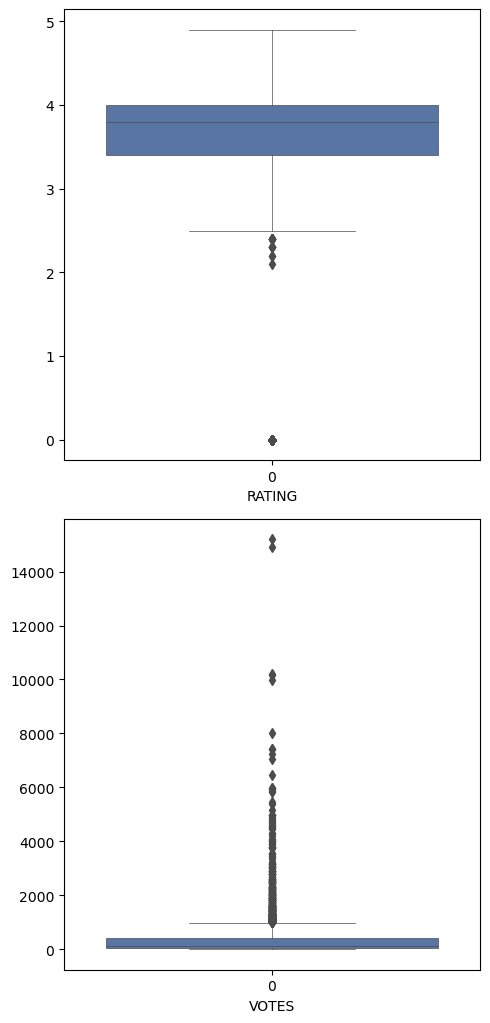

In [183]:
plt.figure(figsize=(5,15))
index=1
for feature in num_features:
    if index<=len(num_features):
        plt.subplot(3,1,index)
        sns.boxplot(df_test[feature],palette='deep',linewidth=.5)
        plt.xlabel(feature)
        index+=1
        
plt.tight_layout()

Checking outlier using zscore

In [184]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[['RATING','VOTES']]))
    print(np.where(z_score>3))
    return z_score

Checking for zscore values

In [185]:
z_score=outliers_detection(df_test)

(array([  31,   83,   86,   92,  282,  377,  479,  534,  730,  759,  763,
        804,  806,  880,  987, 1093, 1098, 1111, 1147, 1156, 1314, 1324,
       1692, 1751, 1789, 1870, 1998, 2019, 2093, 2130, 2140, 2194, 2215,
       2304, 2326, 2355, 2363, 2415, 2486, 2639, 2641, 2657, 2697, 2749,
       2771, 2798, 2834, 2843, 2850, 2911, 2940, 2962, 3015, 3041, 3129,
       3209, 3279, 3317, 3442, 3443, 3501, 3520, 3683, 3703, 3728, 3734,
       3950, 4006, 4047, 4067, 4119, 4124, 4151, 4163], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


Removing outliers in the dataset

In [187]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [188]:
df_clean=removing_outliers(z_score,df_test)

In [189]:
df_clean.shape

(4157, 14)

Calculating the total data loss

In [190]:
total_data_loss=df_test.shape[0]-df_clean.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 74


Calculating the percentage of data loss

In [191]:
total_data=df_test.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 1.75%


Assigning the outlier free dataset to df_test

In [192]:
df_test=df_clean

### Skewness check

In [193]:
df_test[['RATING','VOTES']].skew()

RATING   -2.179015
VOTES     2.507474
dtype: float64

Removing skewness in VOTED using cube root

In [194]:
votes_cbrt=np.cbrt(df_test['VOTES'])

In [195]:
votes_cbrt.skew()

0.2649249208946332

In [196]:
df_test['VOTES']=votes_cbrt

### Applying LabelEncoder

In [197]:
cat_features_test=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
cat_features_test

['TITLE_1',
 'TITLE_2',
 'CUISINE_1',
 'CUISINE_2',
 'CUISINE_3',
 'CUISINE_4',
 'CUISINE_5',
 'CUISINE_6',
 'CUISINE_7',
 'CUISINE_8',
 'CITY',
 'LOCALITY']

In [199]:
df_test[cat_features_test]=df_test[cat_features_test].apply(lambda column: le.fit_transform(column))

### Scaling the Dataset

In [202]:
def StandardScaling(df_test):
    ss=StandardScaler()
    df_test=pd.DataFrame(ss.fit_transform(df_test),columns=df_test.columns)
    return df_test

In [203]:
df_test=StandardScaling(df_test)

# Variance Inflation Factor

In [204]:
def vif_cal(df_test):
    vif=pd.DataFrame()
    vif['Features']=df_test.columns
    vif['VIF Factor']=[VIF(df_test.values,i) for i in range(df_test.shape[1])]
    return vif

In [205]:
vif_cal(df_test)

,Features,VIF Factor
0,TITLE_1,1.111742
1,TITLE_2,1.034642
2,CUISINE_1,1.067424
3,CUISINE_2,1.078603
4,CUISINE_3,1.285965
5,CUISINE_4,1.406267
6,CUISINE_5,1.446162
7,CUISINE_6,1.439695
8,CUISINE_7,1.209463
9,CUISINE_8,1.077509


# Testing the test dataset

In [206]:
test_model=pickle.load(open('Restaurant_Price_Prediction.pkl','rb'))
pred=test_model.predict(df_test)
print(pred)

[1478.27672145  499.71666667 1363.75227494 ...  421.63217725  322.30760206
  407.80164141]
